# Income Prediction

In this case study, we will build a decision tree to predict the income of a given population, which is labelled as <=$50K and >$50K. The attributes (predictors) are age, working class type, marital status, gender, race etc.


In the following sections, we'll:
- clean and prepare the data, 
- build a decision tree with default hyperparameters, 
- understand all the hyperparameters that we can tune, and finally
- choose the optimal hyperparameters using grid search cross-validation.

## Step 1 - Importing Libraries

In [1]:
# Importing the required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating plots and visualizations
%matplotlib inline
# The '%matplotlib inline' command ensures that plots are displayed inline within the notebook
import seaborn as sns  # For enhanced data visualization
from sklearn import preprocessing  # For data preprocessing and scaling

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
# This code suppresses warning messages for cleaner output


## Step 2 - Importing Dataset

In [2]:
# Reading the CSV file and storing it in the 'df' object (DataFrame)
df = pd.read_csv("adult.csv")


## Step 3 - Basic Data Exploration

In [3]:
# Display the first few rows of the DataFrame 'df'
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Display information about data types and non-null values in each column of the DataFrame 'df'
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Display the first five rows of the DataFrame 'df' to understand how the data looks
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


You can observe that the columns **workclass and occupation** consist of **missing values** which are represented as **'?'** in the  dataframe.

On looking a bit more closely, you will also find that whenever workclass is having a missing value, occupation is also missing in that row. Let's check how may rows are missing.

In [6]:
# Filter and extract rows with missing values represented as '?' in the 'workclass' column
df_1 = df[df.workclass == '?']

# Print the DataFrame containing rows with missing values
df_1


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Now we can check the number of rows in df_1.

In [7]:
# Display information about data types and non-null values in the DataFrame 'df_1'
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2799 entries, 4 to 48823
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              2799 non-null   int64 
 1   workclass        2799 non-null   object
 2   fnlwgt           2799 non-null   int64 
 3   education        2799 non-null   object
 4   educational-num  2799 non-null   int64 
 5   marital-status   2799 non-null   object
 6   occupation       2799 non-null   object
 7   relationship     2799 non-null   object
 8   race             2799 non-null   object
 9   gender           2799 non-null   object
 10  capital-gain     2799 non-null   int64 
 11  capital-loss     2799 non-null   int64 
 12  hours-per-week   2799 non-null   int64 
 13  native-country   2799 non-null   object
 14  income           2799 non-null   object
dtypes: int64(6), object(9)
memory usage: 349.9+ KB


There are 1836 rows with missing values, which is about 5% of the total data. We choose to simply drop these rows, since dropping just 5% data won't make any harm.

In [8]:
# Drop rows with missing values represented as '?' in the 'workclass' column
df = df[df.workclass != '?']

# Display the first five rows of the DataFrame 'df' after dropping rows
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Let's see whether any other columns contain a "?". Since "?" is a string, we can apply this check only on the categorical columns.

In [9]:
# Select all categorical variables from the DataFrame 'df'
df_categorical = df.select_dtypes(include='object')

# Check whether any other columns contain the value '?' using a lambda function
# The 'axis=0' parameter applies the lambda function along columns
missing_value_counts = df_categorical.apply(lambda x: (x == '?').sum(), axis=0)

# Print the counts of missing values represented as '?'
print(missing_value_counts)


workclass           0
education           0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
native-country    811
income              0
dtype: int64


Thus, the columns occupation and native.country contain some "?"s. Let's get rid of them.

In [10]:
# Drop rows with missing values represented as '?' in the 'occupation' column
df = df[df['occupation'] != '?']

# Drop rows with missing values represented as '?' in the 'native-country' column
df = df[df['native-country'] != '?']


Now we have a clean dataframe which is ready for model building.<br>

In [11]:
# clean dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## Step 4 - Data Preparation

There are a number of preprocessing steps we need to do before building the model. 

Firstly, note that we have both categorical and numeric features as predictors. In previous models such as linear and logistic regression, we had created **dummy variables** for categorical variables, since those models (being mathematical equations) can  process only numeric variables.

All that is not required in decision trees, since they can process categorical variables easily. However, we still need to **encode the categorical variables** into a standard format so that sklearn can understand them and build the tree. We'll do that using the ```LabelEncoder()``` class, which comes with ```sklearn.preprocessing```. 

You can read the documentation of ```LabelEncoder``` <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">here</a>.


### Step 4.1 - Encode categorical variables using Label Encoder

In [12]:
# Select all categorical variables (columns with data type 'object')
categorical_columns = df.select_dtypes(include=['object'])

# Display the first 5 rows of categorical columns
print("First 5 rows of categorical columns:")
print(categorical_columns.head())


First 5 rows of categorical columns:
   workclass     education      marital-status         occupation  \
0    Private          11th       Never-married  Machine-op-inspct   
1    Private       HS-grad  Married-civ-spouse    Farming-fishing   
2  Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3    Private  Some-college  Married-civ-spouse  Machine-op-inspct   
5    Private          10th       Never-married      Other-service   

    relationship   race gender native-country income  
0      Own-child  Black   Male  United-States  <=50K  
1        Husband  White   Male  United-States  <=50K  
2        Husband  White   Male  United-States   >50K  
3        Husband  Black   Male  United-States   >50K  
5  Not-in-family  White   Male  United-States  <=50K  


##### apply Label encoder to df_categorical


In [13]:
from sklearn.preprocessing import LabelEncoder

# Importing LabelEncoder from sklearn.preprocessing

# Assuming 'df_categorical' DataFrame is defined

# Initializing the LabelEncoder
le = LabelEncoder()

# Applying label encoding to the df_categorical DataFrame
df_categorical_encoded = df_categorical.apply(le.fit_transform)

# Printing the first 5 rows of the encoded categorical columns
print("First 5 rows of encoded categorical columns:")
print(df_categorical_encoded.head())


First 5 rows of encoded categorical columns:
   workclass  education  marital-status  occupation  relationship  race  \
0          3          1               4           7             3     2   
1          3         11               2           5             0     4   
2          1          7               2          11             0     4   
3          3         15               2           7             0     2   
5          3          0               4           8             1     4   

   gender  native-country  income  
0       1              39       0  
1       1              39       0  
2       1              39       1  
3       1              39       1  
5       1              39       0  


#### concat df_categorical with original df


In [14]:
# Drop categorical columns from df
df = df.drop(df_categorical.columns, axis=1)

# Concatenate df_categorical_encoded to df
df = pd.concat([df, df_categorical_encoded], axis=1)

# Print the last 5 rows of the updated DataFrame
print("Last 5 rows of updated DataFrame:")
print(df.tail())

Last 5 rows of updated DataFrame:
       age  fnlwgt  educational-num  capital-gain  capital-loss  \
48694  NaN     NaN              NaN           NaN           NaN   
48730  NaN     NaN              NaN           NaN           NaN   
48750  NaN     NaN              NaN           NaN           NaN   
48773  NaN     NaN              NaN           NaN           NaN   
48791  NaN     NaN              NaN           NaN           NaN   

       hours-per-week  workclass  education  marital-status  occupation  \
48694             NaN          3          4               2           7   
48730             NaN          4         12               2          12   
48750             NaN          4         10               4          10   
48773             NaN          5         11               0          12   
48791             NaN          3         11               2          10   

       relationship  race  gender  native-country  income  
48694             0     4       1               0   

In [15]:
# look at column types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48791
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  float64
 1   fnlwgt           45222 non-null  float64
 2   educational-num  45222 non-null  float64
 3   capital-gain     45222 non-null  float64
 4   capital-loss     45222 non-null  float64
 5   hours-per-week   45222 non-null  float64
 6   workclass        46043 non-null  int64  
 7   education        46043 non-null  int64  
 8   marital-status   46043 non-null  int64  
 9   occupation       46043 non-null  int64  
 10  relationship     46043 non-null  int64  
 11  race             46043 non-null  int64  
 12  gender           46043 non-null  int64  
 13  native-country   46043 non-null  int64  
 14  income           46043 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 5.6 MB


In [16]:
# Convert the target variable 'income' to categorical
df['income'] = df['income'].astype('category')

# Print the data type of the 'income' column after conversion
print("Data type of 'income' column after conversion:", df['income'].dtype)

Data type of 'income' column after conversion: category


Now all the categorical variables are suitably encoded. Let's build the model.

In [17]:
df.fillna(0, inplace=True)

<hr>

## Step 5 - Model Building and Evaluation


Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [18]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [19]:
# Extracting feature variables (X) by dropping the 'income' column
X = df.drop('income', axis=1)

# Extracting the response variable (y)
y = df['income']

# Printing the shapes of X and y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (46043, 14)
Shape of y: (46043,)


In [20]:
# Splitting the data into train and test sets with a test size of 30% and random state of 99
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# Printing the last 5 rows of X_train
print("Last 5 rows of X_train:")
print(X_train.tail())

Last 5 rows of X_train:
        age    fnlwgt  educational-num  capital-gain  capital-loss  \
37300  51.0  349431.0              9.0        4386.0           0.0   
46106  25.0  230292.0              9.0           0.0           0.0   
38886  42.0  136996.0             10.0           0.0           0.0   
25513  60.0  152711.0             13.0           0.0           0.0   
31664  55.0   56645.0             13.0           0.0           0.0   

       hours-per-week  workclass  education  marital-status  occupation  \
37300            40.0          1         11               2           3   
46106            40.0          3         11               2           3   
38886            48.0          6         15               2          11   
25513            40.0          6          9               2           4   
31664            40.0          3          9               6           5   

       relationship  race  gender  native-country  
37300             0     4       1              39  


Refer documentation on Descision tree Classifier : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Importing DecisionTreeClassifier from the sklearn library

# Initializing a decision tree classifier with default hyperparameters
# We set max_depth to 5 for the purpose of later visualization
dt_default = DecisionTreeClassifier(max_depth=5)

# Fitting the decision tree on the training data
# X_train contains feature variables, and y_train contains the response variable
dt_default.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

### Let's check the evaluation metrics of our default model

Reference link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Importing confusion_matrix, classification_report, and accuracy_score from sklearn metrics

# Making predictions using the trained decision tree model
y_pred_default = dt_default.predict(X_test)

# Printing the classification report
# The classification report provides precision, recall, F1-score, and support for each class.
# It's useful for evaluating the performance of a classification model.
print("Classification Report:")
print(classification_report(y_test, y_pred_default))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10422
           1       0.78      0.53      0.63      3391

    accuracy                           0.85     13813
   macro avg       0.82      0.74      0.77     13813
weighted avg       0.84      0.85      0.84     13813



Reference doc on confusion matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing confusion_matrix and accuracy_score from sklearn metrics

# Printing the confusion matrix
# The confusion matrix provides insights into the number of true positive, true negative,
# false positive, and false negative predictions, which is useful for evaluating a model's performance.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_default))

# Printing the accuracy score
# The accuracy score represents the proportion of correct predictions among all predictions.
print("Accuracy Score:", accuracy_score(y_test, y_pred_default))


Confusion Matrix:
[[9904  518]
 [1597 1794]]
Accuracy Score: 0.8468833707377108


#### Plotting Confusion matrix using plot_confusion_matrix function: 
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

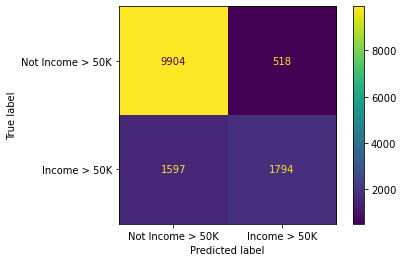

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'dt_default' model is defined and 'X_test' and 'y_test' are available

# Predicting on the test data using the dt_default model
y_pred_default = dt_default.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_default)

# Creating a ConfusionMatrixDisplay object and plotting the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=["Not Income > 50K", "Income > 50K"]).plot()

# Display the plot
plt.show()


## Step 6 - Plotting the Decision Tree - OPTIONAL

To visualise decision trees in python, you need to install certain external libraries. You can read about the process in detail here: http://scikit-learn.org/stable/modules/tree.html

We need the ```tree``` library to plot a tree.

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

# Importing necessary packages for visualization
# Importing matplotlib.pyplot for general visualization
# Importing tree from sklearn for decision tree visualization

# Assuming 'df' is your DataFrame containing the data

# Extracting feature names (excluding the target variable 'income') into a list
features = list(df.columns[1:])

# Defining class labels for the target variable 'income'
cls = [">=50K", "<50K"]


In [26]:
# Assuming 'features' and 'cls' have been defined earlier

# Printing the list of feature names
print("Feature Names:")
print(", ".join(features))
print("-----------------------------")

# Printing the list of class labels
print("Class Labels:")
print(", ".join(cls))


Feature Names:
fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week, workclass, education, marital-status, occupation, relationship, race, gender, native-country, income
-----------------------------
Class Labels:
>=50K, <50K


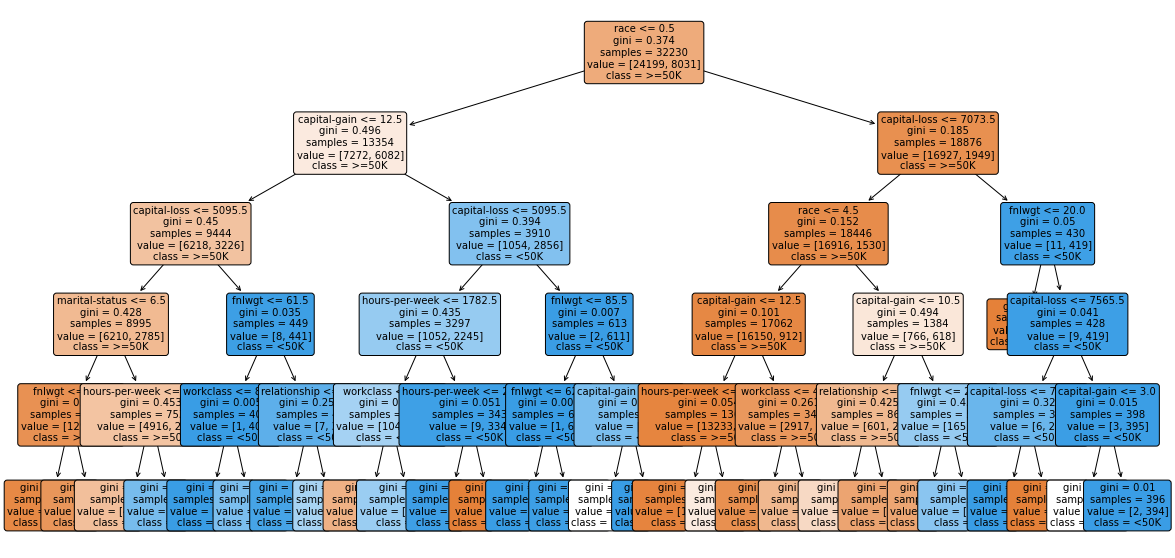

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'dt_default' is your trained decision tree model and 'features' has been defined

# Set the figure size for the plot
plt.figure(figsize=(20, 10))

# Plotting the decision tree with enhanced parameters
a = tree.plot_tree(dt_default,
                   feature_names=features,
                   class_names=cls,
                   filled=True,
                   rounded=True,
                   fontsize=10)           # Adjust fontsize for better readability)

# Display the plotted decision tree
plt.show()


In [28]:
from sklearn import tree

# Assuming 'dt_default' is your trained decision tree model

# Exporting the textual representation of the decision tree
text_representation = tree.export_text(dt_default)

# Printing the textual representation of the decision tree
print("Textual Representation of Decision Tree:")
print(text_representation)


Textual Representation of Decision Tree:
|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_7 <= 6.50
|   |   |   |   |--- feature_0 <= 37.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  37.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  6.50
|   |   |   |   |--- feature_4 <= 1782.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  1782.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  5095.50
|   |   |   |--- feature_0 <= 61.50
|   |   |   |   |--- feature_5 <= 87.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  87.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  61.50
|   |   |   |   |--- feature_9 <= 9.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  9.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_4 <= 1782.50
|  

## Step 7 - Hyperparameter Tuning


The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>




<hr>

So what are we waiting for? Lets Tune it

### Step 7.1 - Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)
    
#### GridSearchCV to find optimal max_depth



Are you new to GridSearchCV? Don't worry we will help you to undertand how to use it. https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489

There is another method of hyperparameter tuning called RandomsearchCV

In [29]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Importing necessary packages for K-fold and GridSearchCV
# Importing DecisionTreeClassifier from sklearn.tree

# Specify the number of folds for k-fold CV (we are using 5)
n_folds = 5

# Parameters to build the model on (As of now, just 'max_depth' from range 1 to 40)
parameters = {'max_depth': range(1, 40)}

# Instantiate the decision tree model (DecisionTreeClassifier) with criterion 'gini' and random_state as 100
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# Instantiate GridSearchCV with the decision tree model, parameters, and other settings
grid_search = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [30]:
# pip install -U scikit-learn

In [31]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Retrieving the scores from the GridSearchCV results
scores = grid_search.cv_results_

# Converting the scores into a DataFrame and displaying the first 5 rows
scores_df = pd.DataFrame(scores)
print("GridSearchCV Scores (First 5 Rows):")
print(scores_df.head())


GridSearchCV Scores (First 5 Rows):
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.017379      0.003216         0.002894        0.001416   
1       0.028954      0.003945         0.003803        0.000358   
2       0.025100      0.001297         0.002659        0.001073   
3       0.031035      0.001724         0.002083        0.000145   
4       0.036243      0.002021         0.002603        0.000487   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.750853           0.750853   
1               2  {'max_depth': 2}           0.823767           0.819113   
2               3  {'max_depth': 3}           0.838039           0.831213   
3               4  {'max_depth': 4}           0.844089           0.837574   
4               5  {'max_depth': 5}           0.849054           0.847037   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.750

Now let's visualize how train and test score changes with max_depth.

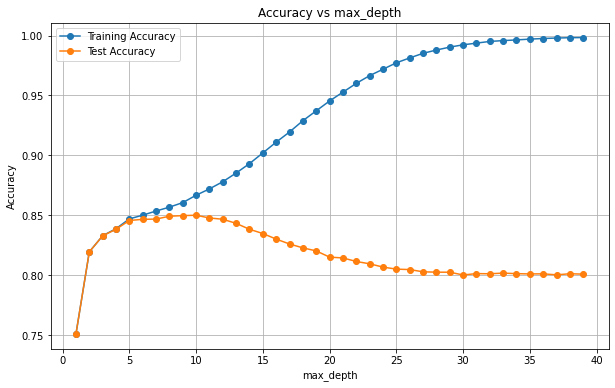

In [32]:
import matplotlib.pyplot as plt

# Assuming 'scores' is a DataFrame containing GridSearchCV results

# Creating a plot to visualize accuracies with max_depth vs mean train and test scores
plt.figure(figsize=(10, 6))

# Plotting training accuracy vs max_depth
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plotting test accuracy vs max_depth
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="Test Accuracy", marker='o')

# Adding labels and title
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs max_depth")
plt.legend()
plt.grid()

# Display the plot
plt.show()


You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

<hr>

### Step 7.2 - Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Importing necessary packages for GridSearchCV
# Importing DecisionTreeClassifier from sklearn.tree

# Assuming 'X_train' and 'y_train' have been defined

# Specify the number of folds for k-fold CV (here 5)
n_folds = 5

# Parameters to build the model on (min_samples_leaf with range 5 to 200 and step of 20)
parameters = {'min_samples_leaf': range(5, 200, 20)}

# Instantiate the decision tree model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# Instantiate GridSearchCV with the decision tree model, parameters, and other settings
grid_search_min_samples_leaf = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid_search_min_samples_leaf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [34]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Retrieving the scores from the GridSearchCV results
scores = grid_search_min_samples_leaf.cv_results_

# Converting the scores into a DataFrame and displaying the first 5 rows
scores_df = pd.DataFrame(scores)
print("GridSearchCV Scores (First 5 Rows):")
print(scores_df.head())


GridSearchCV Scores (First 5 Rows):
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.110983      0.016521         0.002965        0.000809   
1       0.079893      0.003115         0.002480        0.000362   
2       0.075686      0.004720         0.002492        0.000187   
3       0.067475      0.001921         0.002136        0.000051   
4       0.064989      0.001903         0.002315        0.000226   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.815700   
1                     25  {'min_samples_leaf': 25}           0.841142   
2                     45  {'min_samples_leaf': 45}           0.845175   
3                     65  {'min_samples_leaf': 65}           0.848123   
4                     85  {'min_samples_leaf': 85}           0.847192   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.826714           0.825008           0.824

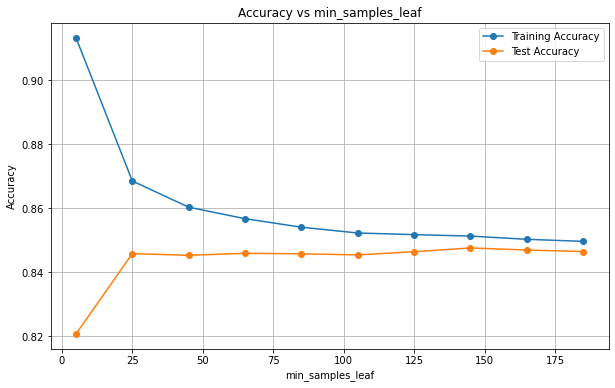

In [35]:
import matplotlib.pyplot as plt

# Assuming 'scores' is a DataFrame containing GridSearchCV results

# Creating a plot to visualize accuracies with min_samples_leaf vs mean train and test accuracy
plt.figure(figsize=(10, 6))

# Plotting training accuracy vs min_samples_leaf
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plotting test accuracy vs min_samples_leaf
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="Test Accuracy", marker='o')

# Adding labels and title
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_leaf")
plt.legend()
plt.grid()

# Display the plot
plt.show()


You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

<hr>

### Step 7.3 - Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [36]:
# Specify the number of folds for k-fold CV (here 5)
n_folds = 5

# Parameters to build the model on (min_samples_split with range 5 to 200 and step size as 20)
parameters = {'min_samples_split': range(5, 200, 20)}

# Instantiate the decision tree model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

# Instantiate GridSearchCV with the decision tree model, parameters, and other settings
grid_search_min_samples_split = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid_search_min_samples_split.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [37]:
# Retrieving the scores from the GridSearchCV results
scores = grid_search_min_samples_split.cv_results_

# Converting the scores into a DataFrame and displaying the first 5 rows
scores_df = pd.DataFrame(scores)
print("GridSearchCV Scores (First 5 Rows):")
print(scores_df.head())

GridSearchCV Scores (First 5 Rows):
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.105660      0.004229         0.003092        0.000505   
1       0.093468      0.002488         0.002305        0.000063   
2       0.089947      0.004439         0.002280        0.000079   
3       0.093423      0.007790         0.002641        0.000881   
4       0.087140      0.001761         0.002239        0.000105   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.799255   
1                      25  {'min_samples_split': 25}           0.827645   
2                      45  {'min_samples_split': 45}           0.835867   
3                      65  {'min_samples_split': 65}           0.841142   
4                      85  {'min_samples_split': 85}           0.840987   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.810580           0.809339    

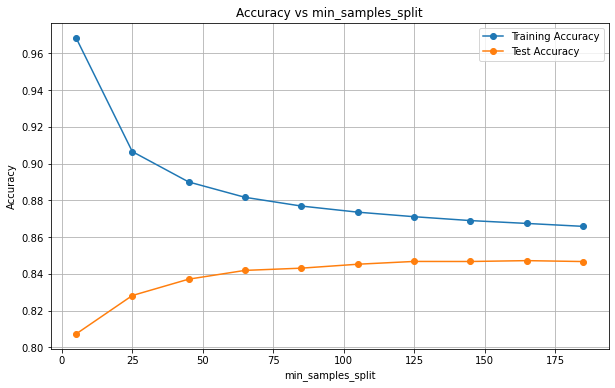

In [38]:
import matplotlib.pyplot as plt

# Assuming 'scores' is a DataFrame containing GridSearchCV results

# Creating a plot to visualize accuracies with min_samples_split vs mean train and test accuracy
plt.figure(figsize=(10, 6))

# Plotting training accuracy vs min_samples_split
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="Training Accuracy", marker='o')

# Plotting test accuracy vs min_samples_split
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="Test Accuracy", marker='o')

# Adding labels and title
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_split")
plt.legend()
plt.grid()

# Display the plot
plt.show()


This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

### Step 7.4 - Grid Search to Find multiple Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [39]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Specify the number of folds for k-fold CV (here 5)
n_folds = 5

# Instantiate the decision tree model with default parameters (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV with the decision tree model, parameter grid, and other settings
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=n_folds, verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [40]:
# Creating a DataFrame from the cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Printing the cross-validation results DataFrame
print("Cross-Validation Results:")
print(cv_results)

Cross-Validation Results:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.042590      0.002948         0.002683        0.000456   
1        0.040100      0.002667         0.001965        0.000128   
2        0.036915      0.000565         0.001852        0.000037   
3        0.036359      0.000280         0.001800        0.000048   
4        0.073346      0.012316         0.002343        0.000370   
5        0.074019      0.005717         0.002926        0.000783   
6        0.063829      0.002858         0.002315        0.000307   
7        0.060525      0.000290         0.002013        0.000031   
8        0.035852      0.004630         0.002287        0.000781   
9        0.033370      0.000248         0.001821        0.000104   
10       0.033008      0.000278         0.001832        0.000140   
11       0.032806      0.000186         0.001708        0.000018   
12       0.057166      0.000091         0.001954        0.000071   
13       0.057120     

In [41]:
# Assuming 'grid_search' is your GridSearchCV object

# Printing the optimal accuracy score
print("Best Accuracy:", grid_search.best_score_)

# Printing the best hyperparameters and their values
print("Best Hyperparameters:", grid_search.best_params_)


Best Accuracy: 0.8492088116661496
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


<hr>

**Running the model with best parameters obtained from grid search.**

In [42]:
# Creating a decision tree classifier with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion='gini',
                                  random_state=100,        # For reproducibility
                                  max_depth=10,            # Optimal max depth from grid search
                                  min_samples_leaf=50,     # Optimal min samples leaf from grid search
                                  min_samples_split=50)    # Optimal min samples split from grid search

# Fitting the decision tree classifier on the training data
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [43]:
# Calculating the accuracy score of the clf_gini model on the test data
accuracy = clf_gini.score(X_test, y_test)

# Displaying the accuracy score
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8506479403460508


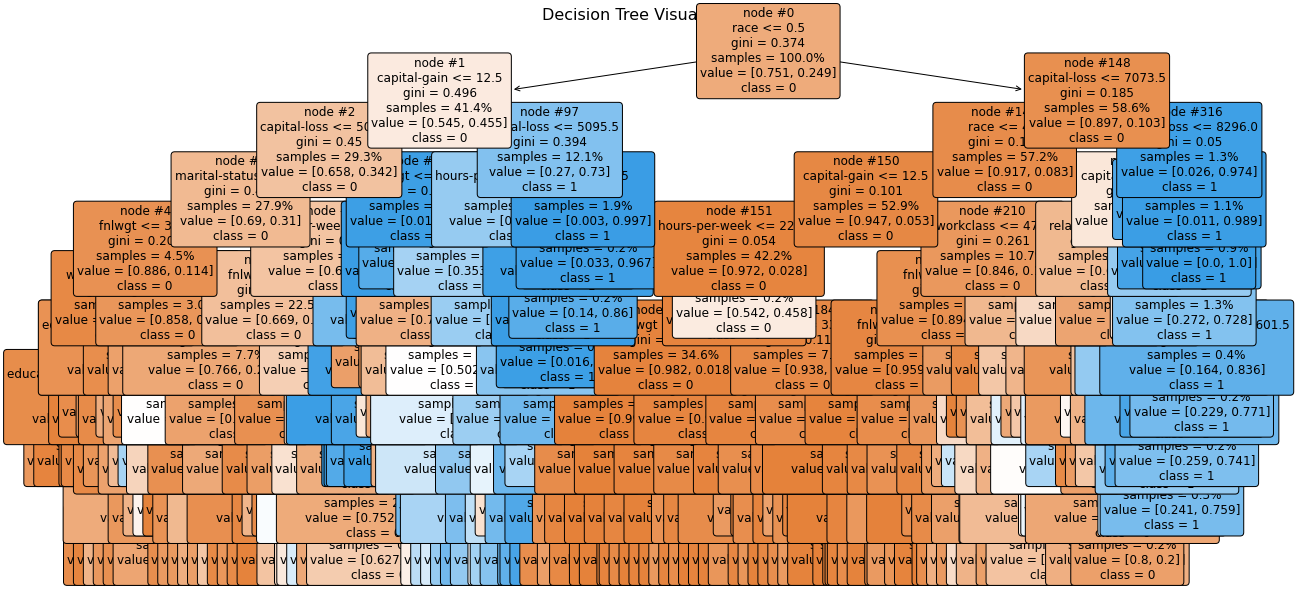

In [44]:
# Plotting the decision tree with improved aesthetics
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini,
               feature_names=features,
               class_names=["0", "1"],
               filled=True,
               rounded=True,
               fontsize=12,
               impurity=True,    # Show impurity at nodes
               node_ids=True,    # Show node IDs
               proportion=True,  # Show class proportions
               )
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

You can see that this tree is too complex to understand. Let's try reducing just max_depth and see how the tree looks.

In [45]:
# Creating a decision tree classifier with specific hyperparameters
# and limited depth for visualization purposes
clf_gini = DecisionTreeClassifier(criterion='gini',
                                  random_state=100,
                                  max_depth=3,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

# Fitting the decision tree classifier on the training data
clf_gini.fit(X_train, y_train)

# Calculating and printing the accuracy score of the decision tree model on the test data
accuracy = clf_gini.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8346485195106059


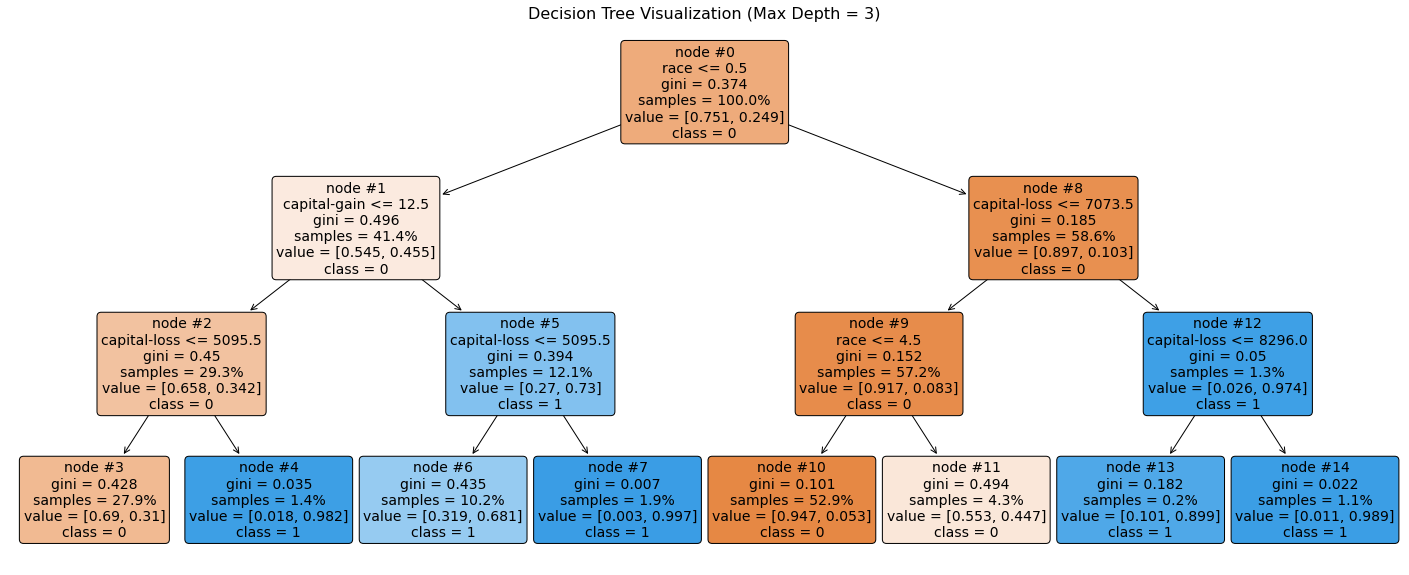

In [46]:
# Plotting the decision tree with max_depth=3 and enhanced aesthetics
plt.figure(figsize=(25, 10))
tree.plot_tree(clf_gini,
               feature_names=features,
               class_names=["0", "1"],
               filled=True,
               rounded=True,
               fontsize=14,
               impurity=True,    # Show impurity at nodes
               node_ids=True,    # Show node IDs
               proportion=True,  # Show class proportions
               )
plt.title("Decision Tree Visualization (Max Depth = 3)", fontsize=16)
plt.show()

So beautifull! Isn't it. The above tree looks bit more clear and understanding. 

Let us now check classification matrix

In [47]:
# Predicting on the test data using the clf_gini model
y_pred = clf_gini.predict(X_test)

# Printing the classification report matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     10422
           1       0.77      0.46      0.58      3391

    accuracy                           0.83     13813
   macro avg       0.81      0.71      0.74     13813
weighted avg       0.83      0.83      0.82     13813



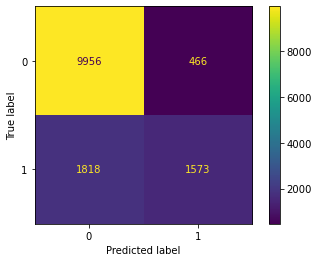

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'clf_gini' model is defined and 'X_test' and 'y_test' are available

# Predicting on the test data using the clf_gini model
y_pred = clf_gini.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a ConfusionMatrixDisplay object and plotting the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=["0", "1"]).plot()

# Display the plot
plt.show()


Well! the above model is not much better than the default model. Still its fine. Not that bad. Atleast now tree is not much complex to understand.

### Optional Step - Pruning in Descision tree

PRUNING! Sounds like a new jargan. 

Pruning is one of the techniques that is used to overcome our problem of Overfitting. Pruning, in its literal sense, is a practice which involves the selective removal of certain parts of a tree(or plant), such as branches, buds, or roots, to improve the tree’s structure, and promote healthy growth. This is exactly what Pruning does to our Decision Trees as well. It makes it versatile so that it can adapt if we feed any new kind of data to it, thereby fixing the problem of overfitting.

It reduces the size of a Decision Tree which might slightly increase your training error but drastically decrease your testing error, hence making it more adaptable.

Pruning sounds interesting! Lets apply prune our model to avoid overfitting.

**Minimal Cost-Complexity** Pruning is one of the types of Pruning of Decision Trees. This algorithm is parameterized by α(≥0) known as the complexity parameter. Not getting? Don't worry we will not let you get confused. Check out this documentation link link
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html


DecisionTree in sklearn has a function called cost_complexity_pruning_path, which gives the effective alphas of subtrees during pruning and also the corresponding impurities. In other words, we can use these values of alpha to prune our decision tree.


## Step 8 - Results and Conclusion

Test Accuracy of our final model is 83% which is preety good.